In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

c:\users\hmittapa\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,17,18,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(2461176, 41)

In [4]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37188206,09/14/2017 04:40:33 PM,10/19/2018 07:30:48 AM,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11374,63-11 WETHEROLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.728620,-73.865295,"(40.728619539832, -73.865295234063)"
1,35735866,03/18/2017 10:09:57 AM,10/19/2018 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Curb Cut/Driveway/Carport - Illegal,NaN,11420,111-36 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680213,-73.821227,"(40.680213167851, -73.821227012238)"
2,35819933,03/29/2017 12:38:28 PM,10/19/2018 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Curb Cut/Driveway/Carport - Illegal,NaN,11230,1141 EAST 14 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.621648,-73.961658,"(40.621648480559, -73.961657984968)"
3,36364350,06/05/2017 12:47:55 PM,10/19/2018 07:51:20 AM,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,10028,507 EAST 81 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.772523,-73.949018,"(40.772523413318, -73.949017827856)"
4,36451986,06/15/2017 11:56:36 AM,NaN,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted Less Than 2 Years Ago,Street,10467,305 EAST 207 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.875447,-73.876262,"(40.87544734964, -73.876261528288)"


In [7]:
data.isnull().sum()

Unique Key                              0
Created Date                            0
Closed Date                         55108
Agency                                  0
Agency Name                             0
Complaint Type                          0
Descriptor                          38428
Location Type                      521377
Incident Zip                       117823
Incident Address                   424697
Street Name                        424811
Cross Street 1                    1104722
Cross Street 2                    1111888
Intersection Street 1             2135171
Intersection Street 2             2136853
Address Type                        80385
City                               117949
Landmark                          2460482
Facility Type                     1616658
Status                                  0
Due Date                          1302017
Resolution Description              56226
Resolution Action Updated Date      44305
Community Board                   

In [8]:
data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

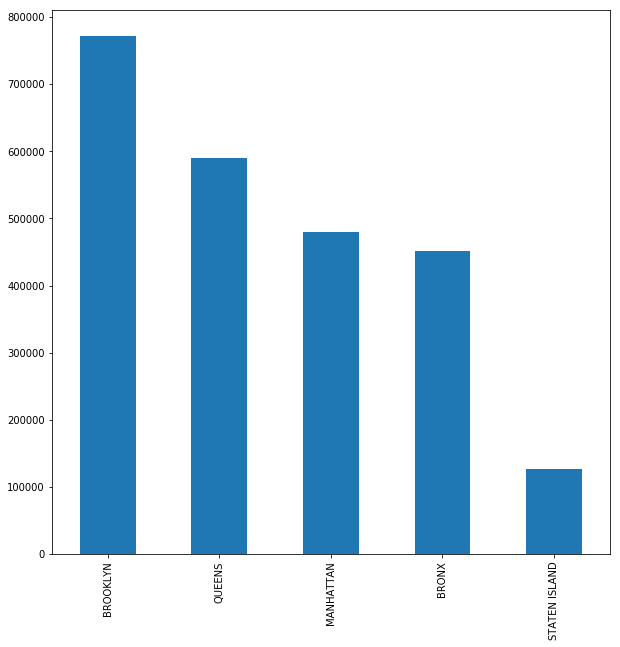

In [8]:
data['Borough'].value_counts()[:-1].plot(kind="bar",figsize=(10,10))
plt.show()

In [26]:
newdf=data[['Complaint Type','Borough','Created Date','Incident Zip']]

In [43]:
newdf['Year']= newdf['Created Date'].apply(lambda x:int(x.split()[0].split('/')[-1]))
newdf['Year'].value_counts()

2017    2461176
Name: Year, dtype: int64

In [42]:
newdf=newdf.loc[newdf['Year'] >= 2017 ]
newdf

,Complaint Type,Borough,Created Date,Incident Zip,Year
0,New Tree Request,QUEENS,09/14/2017 04:40:33 PM,11374,2017
1,General Construction/Plumbing,QUEENS,03/18/2017 10:09:57 AM,11420,2017
2,General Construction/Plumbing,BROOKLYN,03/29/2017 12:38:28 PM,11230,2017
3,New Tree Request,MANHATTAN,06/05/2017 12:47:55 PM,10028,2017
4,Dead/Dying Tree,BRONX,06/15/2017 11:56:36 AM,10467,2017
5,New Tree Request,MANHATTAN,06/19/2017 10:30:46 AM,10003,2017
6,New Tree Request,MANHATTAN,06/29/2017 09:25:59 AM,10028,2017
7,Damaged Tree,BRONX,07/01/2017 12:23:20 PM,10467,2017
8,Damaged Tree,BRONX,07/01/2017 11:47:03 AM,10467,2017
9,General Construction/Plumbing,QUEENS,07/10/2017 10:27:37 AM,11385,2017


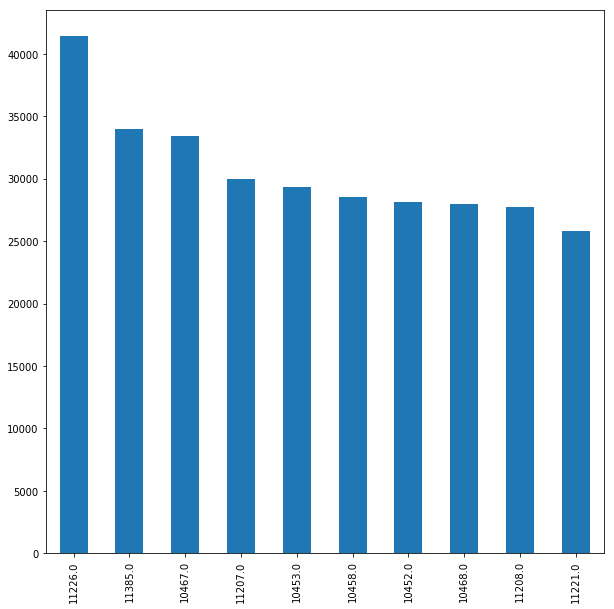

In [27]:
newdf['Incident Zip'].value_counts()[:10].plot(kind="bar",figsize=(10,10))
plt.show()

## 1)	Create a script that grabs data from the CSV using the Pandas library.  

### i)	Find the 10 most common overall “Complaint types” for the year 2017 from the CSV.  (‘Complaint Type’ is a schema field. )

### ii)	Once you have the Complaint Types in part “i”,  ( see numbered list 1-5 above) , how many of each of those 10 types were there in 2017, for each borough? Output a generated CSV with the result.


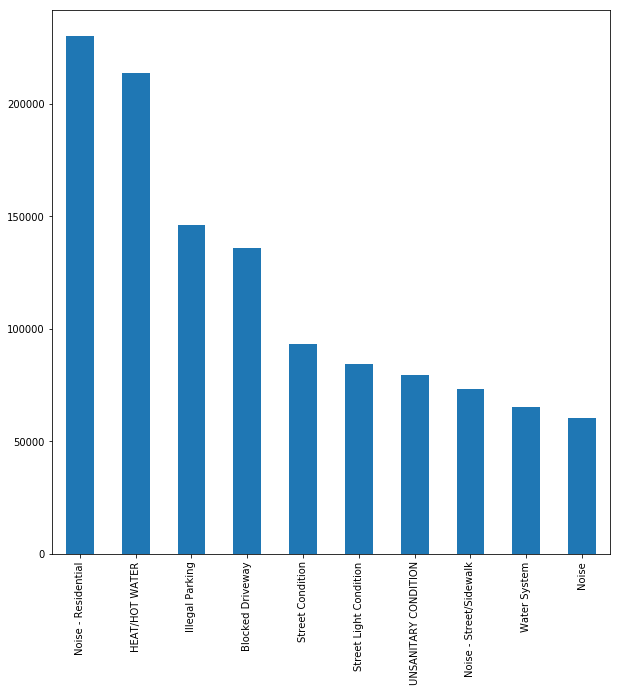

In [45]:
newdf['Complaint Type'].value_counts()[:10].plot(kind='bar',figsize=(10,10))

In [67]:
comp_df=newdf.loc[newdf['Complaint Type'].isin(newdf['Complaint Type'].value_counts()[:10].index)]
comp_df['Complaint Type'].value_counts()

Noise - Residential        230152
HEAT/HOT WATER             213521
Illegal Parking            146122
Blocked Driveway           136097
Street Condition            93265
Street Light Condition      84195
UNSANITARY CONDITION        79282
Noise - Street/Sidewalk     73085
Water System                65100
Noise                       60171
Name: Complaint Type, dtype: int64

## Task 2
### 2)	Find the 10 most populous zip codes.  Extract the list of all unique zip codes in the “Incident_zip” field and match them up with the values from the ‘ZipCode_Population’. 

#### i)	For each of the 10 zip codes, count the number of complaints per each complaint type.  
#### ii)	Output a 10 by 10 graph, x-axis is the “Complaint Type” and the y-axis are the zip codes.  We are looking for 100 values.  
##### iii)	ZipCode_Population.csv (attached to project)


In [69]:
newdf['Incident Zip'].value_counts()[:10]

11226.0    41438
11385.0    33985
10467.0    33434
11207.0    29961
10453.0    29333
10458.0    28500
10452.0    28135
10468.0    27981
11208.0    27738
11221.0    25802
Name: Incident Zip, dtype: int64

In [73]:
uniq_inc_zips=newdf['Incident Zip'].unique()
ZipCode_Population=pd.read_csv('ZipCode_Population.csv')

In [74]:
ZipCode_Population.loc[ZipCode_Population['Zip Code ZCTA'].isin(uniq_inc_zips)]

,Zip Code ZCTA,2017 Census Population
1835,7002,63031
1854,7024,35353
1891,7070,18061
1910,7093,60884
1916,7105,46983
1924,7114,14748
2024,7670,14573
2392,8830,18459
2429,10001,21102
2430,10002,81410


In [78]:
comp_pereach_comptype=newdf.loc[newdf['Incident Zip'].isin(newdf['Incident Zip'].value_counts()[:10].index)]
comp_pereach_comptype['Complaint Type'].value_counts()

HEAT/HOT WATER                           44783
Noise - Residential                      40353
Blocked Driveway                         18240
UNSANITARY CONDITION                     17625
PAINT/PLASTER                            14477
Illegal Parking                          13317
PLUMBING                                 11932
Noise - Street/Sidewalk                  10542
DOOR/WINDOW                               8327
WATER LEAK                                7977
Water System                              6550
Street Condition                          6307
FLOORING/STAIRS                           6076
ELECTRIC                                  5631
GENERAL                                   5336
Rodent                                    5077
Request Large Bulky Item Collection       4802
Derelict Vehicles                         4409
Noise - Vehicle                           4407
Street Light Condition                    4141
Dirty Conditions                          3839
Sanitation Co

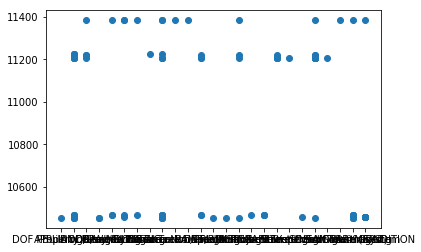

In [91]:
plt.plot(comp_pereach_comptype['Complaint Type'][:100],comp_pereach_comptype['Incident Zip'][:100],'o')